In [116]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect
!pip install nltk

In [117]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\23481\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [118]:
# Authentication
api_key = "HcGe10IklXovlFFhc8Xf5Twpo"
api_secret = "adgHGojconcOXtQeqBfnQ1JrZzZhCZ47HkxoNtq80ZqDPZPUJn"
#bearer_token = "AAAAAAAAAAAAAAAAAAAAABfhBAEAAAAAxj6KPFxYJEhch184eoWoCsnSYXk%3DDusGtKfSVn0D6w7WhzJ5MPrfsMhOeJ58rFKKFQf5gxgD9ELih9"
access_token = "415803231-zEPYHrDww5XqiZn0sVfGONiKt5vNo3GZQE7VaDjs"
access_token_secret = "ZJy1YrmP30Ohan0xX8qqsAKZWKk0GCk04TfOKKSlYL3uI"
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [119]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
#API.search_tweets(keyword, *, geocode, lang, locale, result_type, count, until, since_id, max_id, include_entities)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
if neg > pos:
     negative_list.append(tweet.text)
     negative += 1
elif pos < neg:
     positive_list.append(tweet.text)
     positive += 1
 
elif pos == neg:
     neutral_list.append(tweet.text)
     neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

# Create file
csvFile = open("data.csv", "tweets", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

Please enter keyword or hashtag to search: #IPOB
Please enter how many tweets to analyze: 3000


TweepyException: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/search/tweets.json?q=%23IPOB&max_id=1493948277355847681 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000019BA33A8250>: Failed to establish a new connection: [WinError 10053] An established connection was aborted by the software in your host machine'))

In [91]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2000
positive number:  0
negative number:  1
neutral number:  0


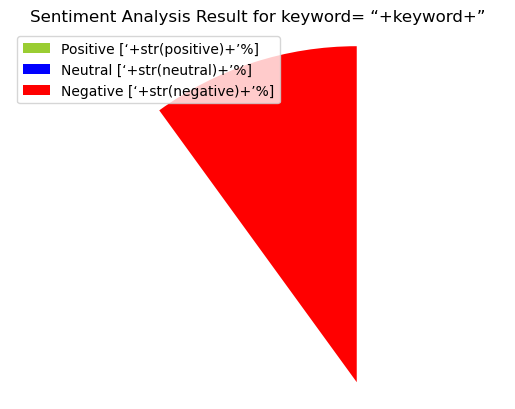

In [92]:
#Creating PieCart
labels = ['Positive [‘+str(positive)+’%]' , 'Neutral [‘+str(neutral)+’%]', "Negative [‘+str(negative)+’%]"]
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue', 'red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= “+keyword+”")
plt.axis('equal')
plt.show()

In [93]:
tweet_list

,0
0,RT @EmekaGift100: Mazi Nnamdi Kanu said in the...
1,RT @DrKen43273749: DOS OR IPOB LEADERSHIP DONT...
2,RT @Amaka_Ekwo: The leader of IPOB goes to cou...
3,RT @Libzman: The Nigerian Version will crack y...
4,RT @General_Somto: 📸▪️Mazi Nnamdi Kanu Has Arr...
...,...
1995,RT @Amaka_Ekwo: The leader of IPOB goes to cou...
1996,RT @EmekaGift100: Mazi Nnamdi Kanu said in the...
1997,RT @Jimsamson22: #PHOTOS Of IPOB SPAIN MASSIV...
1998,RT @ElochukwuOhagi: You spend all your time wr...


In [95]:
tweet_list.drop_duplicates(inplace = True)

In [96]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @EmekaGift100: Mazi Nnamdi Kanu said in the...,...
1,RT @DrKen43273749: DOS OR IPOB LEADERSHIP DONT...,...
2,RT @Amaka_Ekwo: The leader of IPOB goes to cou...,", ..."
3,RT @Libzman: The Nigerian Version will crack y...,\n ...
4,RT @General_Somto: 📸▪️Mazi Nnamdi Kanu Has Arr...,📸▪️ ...
5,RT @ElochukwuOhagi: You spend all your time wr...,...
7,RT @eloquent37: DSS has restricted Barrister A...,...
8,RT @oluchisystem: Breaking: DSS restricts Barr...,: . ...
9,RT @BiafraTPL: Nigeria government #DSS denied ...,# ...
10,"RT @General_Somto: ""Feb 16th 2022, Our Leader'...",""" , ' ( ' ) ..."


In [97]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
     tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
     tw_list.loc[index, 'sentiment'] = "positive"
 else:
     tw_list.loc[index, 'sentiment'] = "neutral"
 tw_list.loc[index, 'neg'] = neg
 tw_list.loc[index, 'neu'] = neu
 tw_list.loc[index, 'pos'] = pos
 tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @EmekaGift100: Mazi Nnamdi Kanu said in the...,...,0.00,0.0,neutral,0.0,0.0,0.0,0.0
1,RT @DrKen43273749: DOS OR IPOB LEADERSHIP DONT...,...,0.00,0.0,neutral,0.0,0.0,0.0,0.0
2,RT @Amaka_Ekwo: The leader of IPOB goes to cou...,", ...",0.00,0.0,neutral,0.0,0.0,0.0,0.0
3,RT @Libzman: The Nigerian Version will crack y...,\n ...,0.00,0.0,neutral,0.0,1.0,0.0,0.0
4,RT @General_Somto: 📸▪️Mazi Nnamdi Kanu Has Arr...,📸▪️ ...,-0.75,1.0,neutral,0.0,1.0,0.0,0.0
5,RT @ElochukwuOhagi: You spend all your time wr...,...,0.00,0.0,neutral,0.0,0.0,0.0,0.0
7,RT @eloquent37: DSS has restricted Barrister A...,...,0.00,0.0,neutral,0.0,0.0,0.0,0.0
8,RT @oluchisystem: Breaking: DSS restricts Barr...,: . ...,0.00,0.0,neutral,0.0,0.0,0.0,0.0
9,RT @BiafraTPL: Nigeria government #DSS denied ...,# ...,0.00,0.0,neutral,0.0,0.0,0.0,0.0
10,"RT @General_Somto: ""Feb 16th 2022, Our Leader'...",""" , ' ( ' ) ...",0.00,0.0,neutral,0.0,0.0,0.0,0.0


In [98]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [99]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,411,100.0


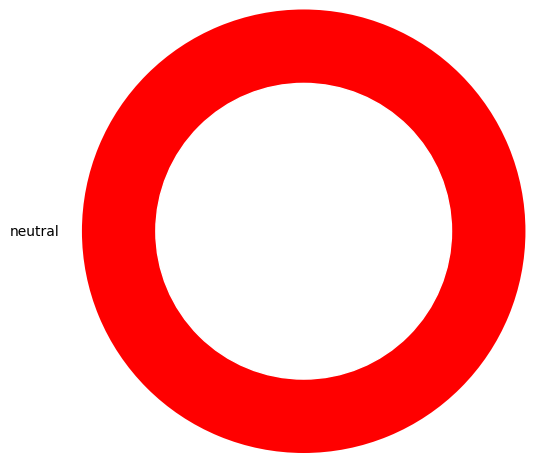

In [100]:

# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 1, color="white")
plt.pie(size, radius = 1.5, labels=names, colors=['red','green','blue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [82]:
#Function to Create Wordcloud
def create_wordcloud(text):
 mask = np.array(Image.open("cloud.png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color= "white",
 mask = mask,
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path= "wc.png"
 display(Image.open(path))

In [83]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

FileNotFoundError: [Errno 2] No such file or directory: 'cloud.png'

In [85]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

FileNotFoundError: [Errno 2] No such file or directory: 'cloud.png'